In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [10]:
region_num=12
region_names=['Hildesheim','Holzminden','Goslar', 'Höxter','Northeim','Göttingen','Harz','Kassel (Land)','Kassel (Stadt)', 'Werra-Meißner-Kreis','Eichsfeld','Nordhausen']
labels={}
for intern_region_number in range(region_num):
    labels[intern_region_number]=region_names[intern_region_number]
region_popsize=np.array([275817.,  70458., 136292., 140251., 132285., 326041., 213310.,
       236764., 202137., 100629., 100006.,  83416.])

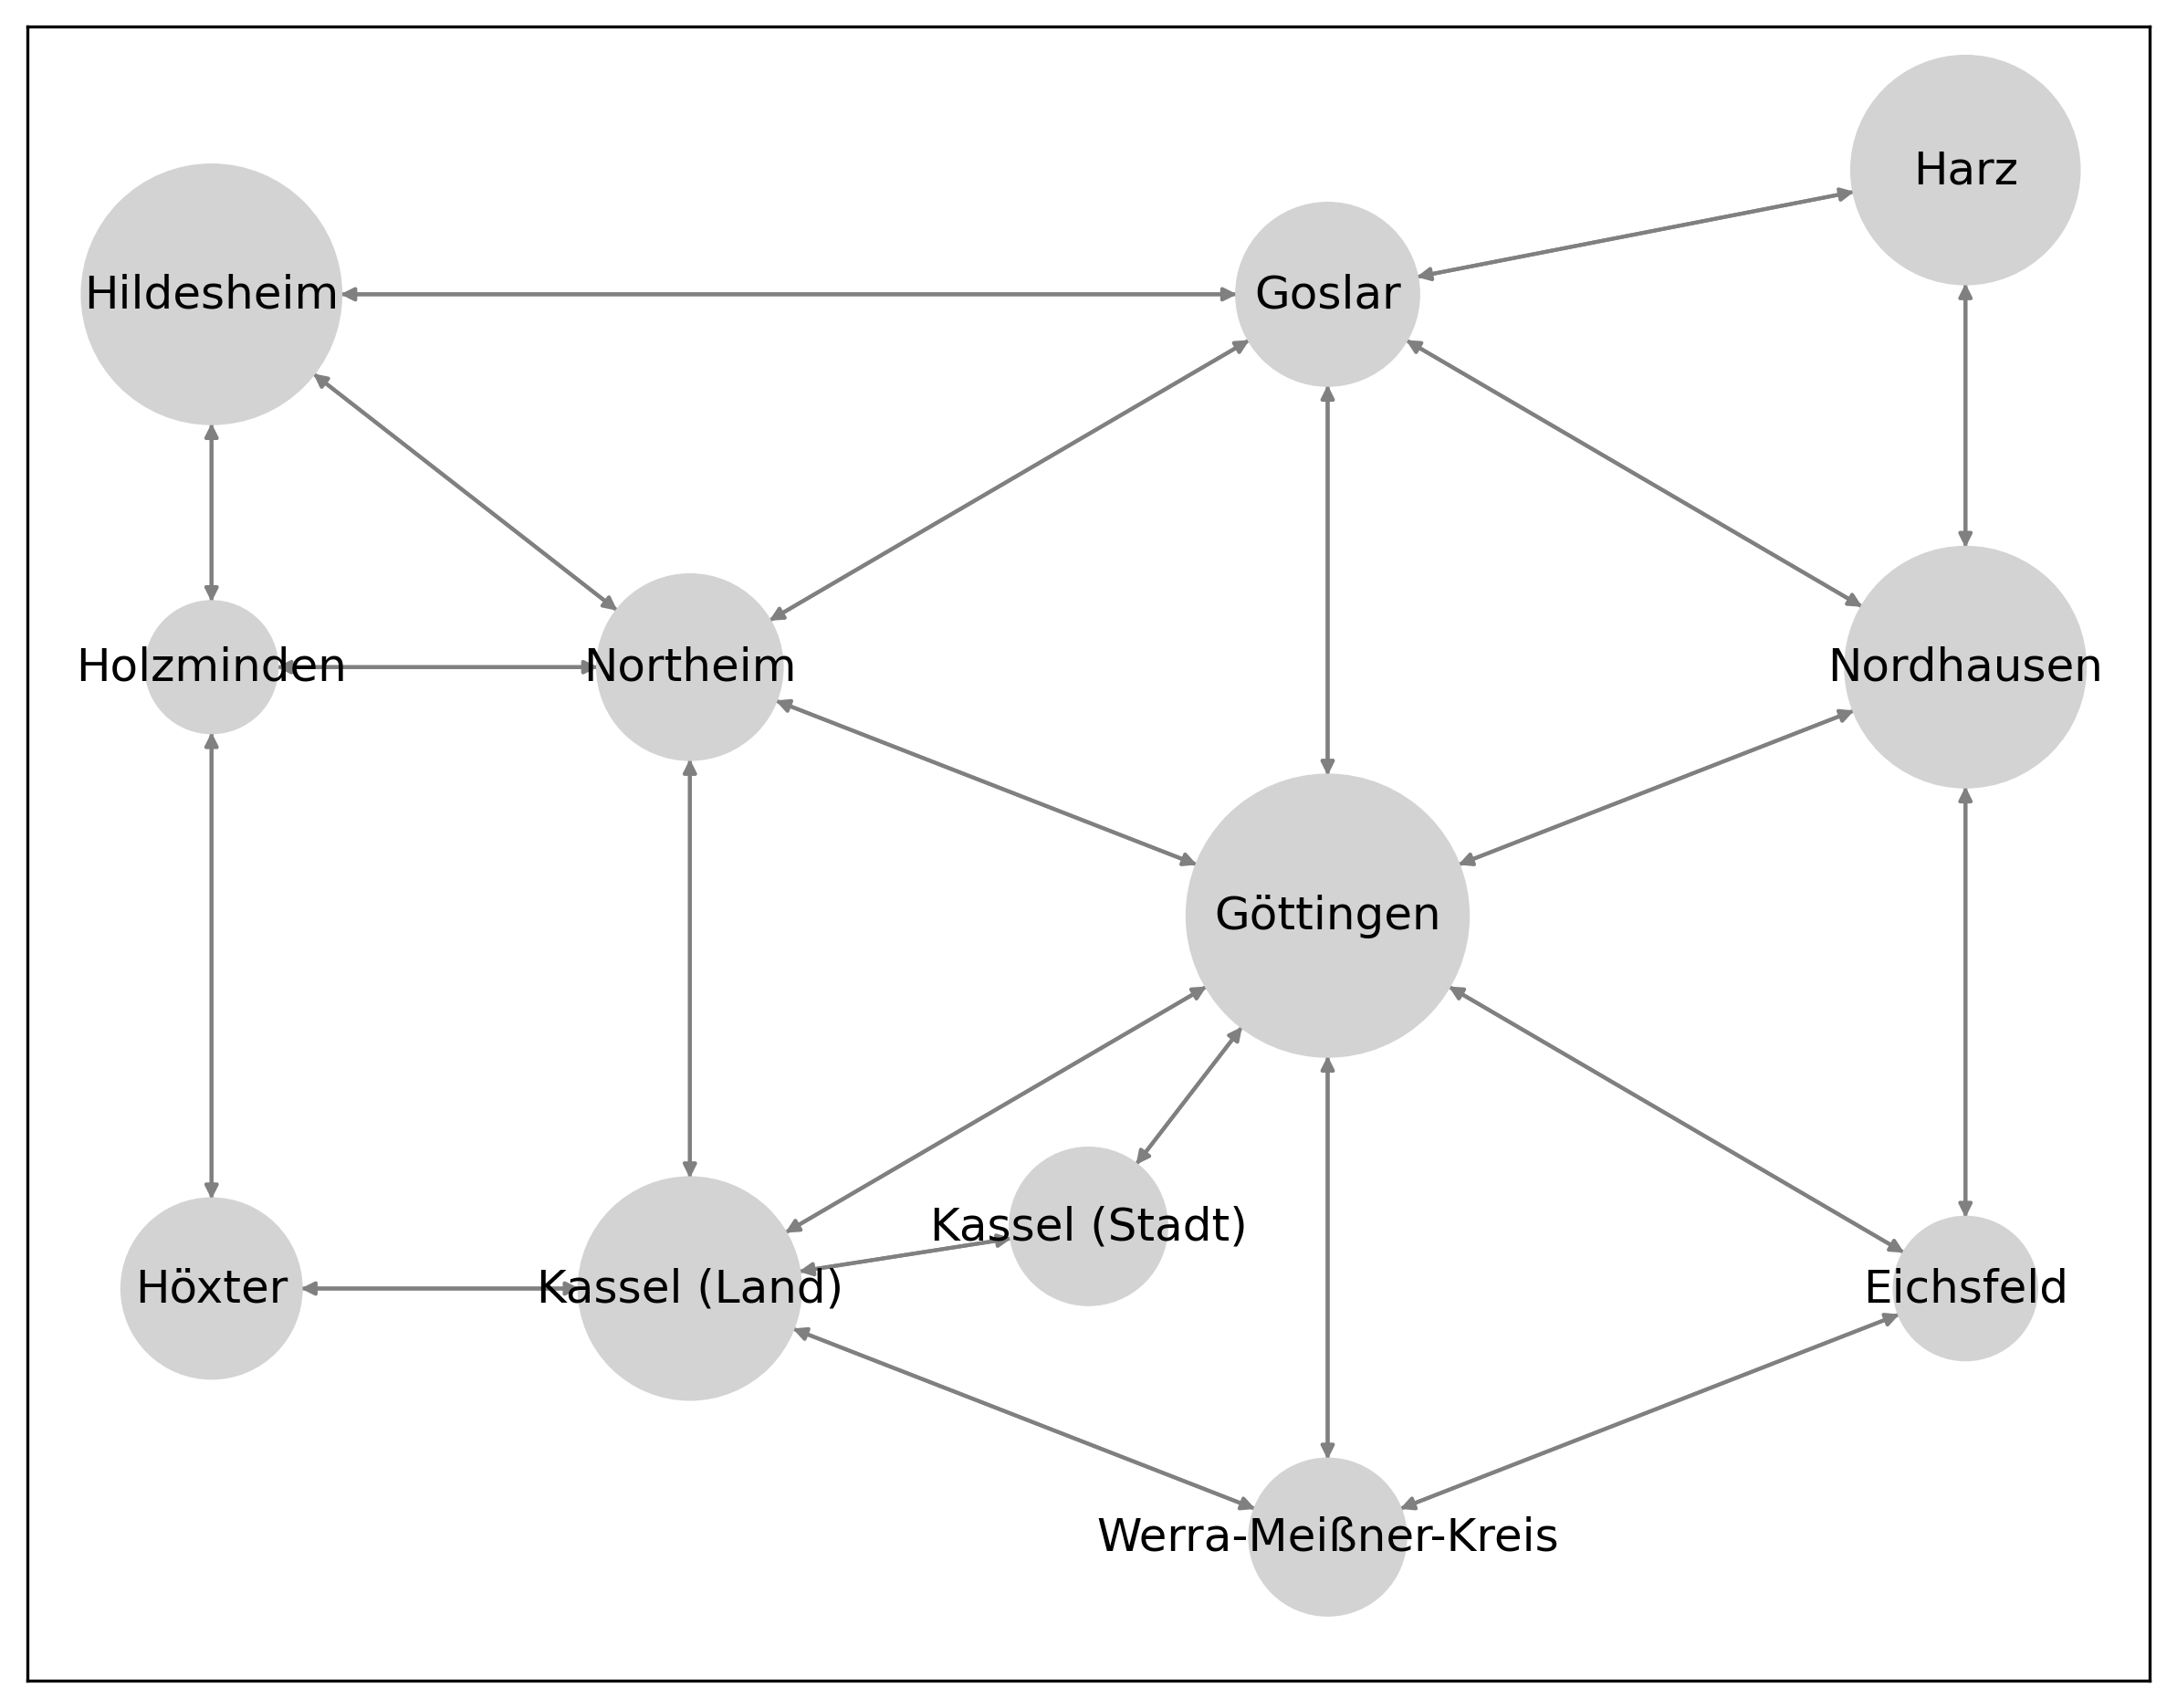

In [86]:
g11_laplace=np.array([[3,-1,-1,0,-1,0,0,0,0,0,0,0],
             [-1,3,0,-1,-1,0,0,0,0,0,0,0],
             [-1,0,5,0,-1,-1,-1,0,0,0,0,-1],
             [0,-1,0,2,0,0,0,-1,0,0,0,0],
             [-1,-1,-1,0,5,-1,0,-1,0,0,0,0],
             [0,0,-1,0,-1,7,0,-1,-1,-1,-1,-1],
             [0,0,-1,0,0,0,2,0,0,0,0,-1],
             [0,0,0,-1,-1,-1,0,5,-1,-1,0,0],
             [0,0,0,0,0,-1,0,-1,2,0,0,0],
             [0,0,0,0,0,-1,0,-1,0,3,-1,0],
             [0,0,0,0,0,-1,0,0,0,-1,3,-1],
             [0,0,-1,0,0,-1,-1,0,0,0,-1,4]])

def adjacence(lap):
    adj=-lap
    dimension=len(adj[1])
    for i in range(dimension):
        adj[i][i]=0
    return adj

g11_adjacence=adjacence(g11_laplace)


def makegraph(matrix):
    G = nx.DiGraph()
    dim=len(matrix[0])
    for i in range(dim): 
        for j in range(dim): 
            if matrix[i][j] == 1: 
                G.add_edge(i,j)
    return G

G1=makegraph(g11_adjacence)

distinct_pos = {0:(0,10),1:(0,7),2:(7,10),3:(0,2),4:(3,7),5:(7,5),6:(11,11),7:(3,2),8:(5.5,2.5),9:(7,0),10:(11,2),11:(11,7)}

plt.figure(figsize=(10,8),dpi=300)
nx.draw_networkx(G1,distinct_pos,node_size=region_popsize/60, labels=labels, with_labels=True, font_color='black', node_color='lightgrey' ,edge_color='grey',cmap=plt.cm.YlOrRd,vmin=0, vmax=0.07,arrowsize=7)
#plt.savefig('G12_Network.png')